# Project 1 FYS-STK4155
### Trial run Kjersti

In [1]:
import pandas as pd
import matplotlib.style as mplstyle

from funcs import *

mplstyle.use(['ggplot', 'fast'])

%load_ext autoreload
%autoreload 2

#### Part a) OLS for the Runge function

* OLS regression analysis using polynomials in x up to order 15 or higher. Add stochastic noise.
* Explore the dependence on the number of data points and the polynomial degree
* Evalute the MSE and R^2 scores. Plot them as functions of polynomial degree.
* Plot the parameters $\theta$ as you increase the order of the polynomial. Comment the results.
* You have to include a scaling/centering of the data.
* Present a critical discussion of why and how you have scaled the data.
* You have to split into test and training data.

In [2]:
n_vals = np.arange(20, 210, 20)  # number of data points
p_vals = np.arange(2, 16) # polynomial degrees 

In [3]:
results = []

for n in n_vals:
    x, y = make_data(n)

    for p in p_vals:
        X = polynomial_features(x, p, intercept=True)
        X, y = standardize(X, y)
        X_train, X_test, y_train, y_test = split_n_train(X, y, size=0.2)

        theta = OLS_parameters(X_train, y_train)
        y_pred = X_test @ theta

        results.append({'n': n, 'p': p, 'theta': theta, 'MSE': MSE(y_test, y_pred), 'R2': R2(y_test, y_pred)})

df_OLS = pd.DataFrame(results)

Text(0.5, 0.98, 'OLS')

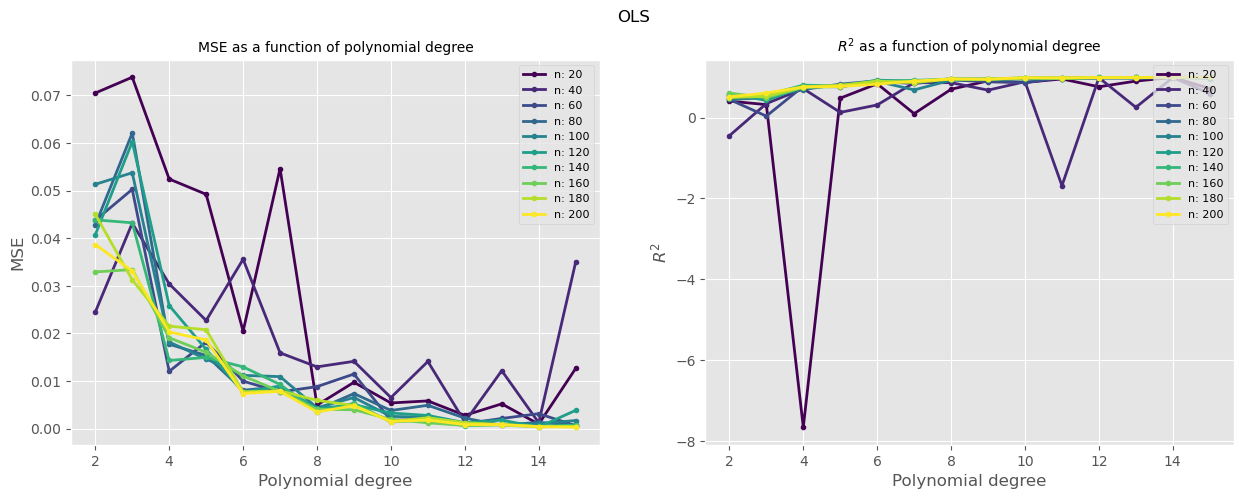

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='viridis'
num_colors = len(n_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, en in enumerate(n_vals):
    n_df = df_OLS[df_OLS['n'] == en]
    color = cmap(i) 
    ax[0].plot(n_df['p'], n_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'n: {en}')

ax[0].set_title('MSE as a function of polynomial degree', fontsize=10)
ax[0].legend(loc='upper right', fontsize=8)
ax[0].set_xlabel('Polynomial degree')
ax[0].set_ylabel('MSE')

for i, en in enumerate(n_vals):
    n_df = df_OLS[df_OLS['n'] == en]
    color = cmap(i) 
    ax[1].plot(n_df['p'], n_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'n: {en}')

ax[1].set_title(r'$R^2$ as a function of polynomial degree', fontsize=10)
ax[1].legend(loc='upper right', fontsize=8)
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle('OLS')

Text(0.5, 0.98, 'OLS')

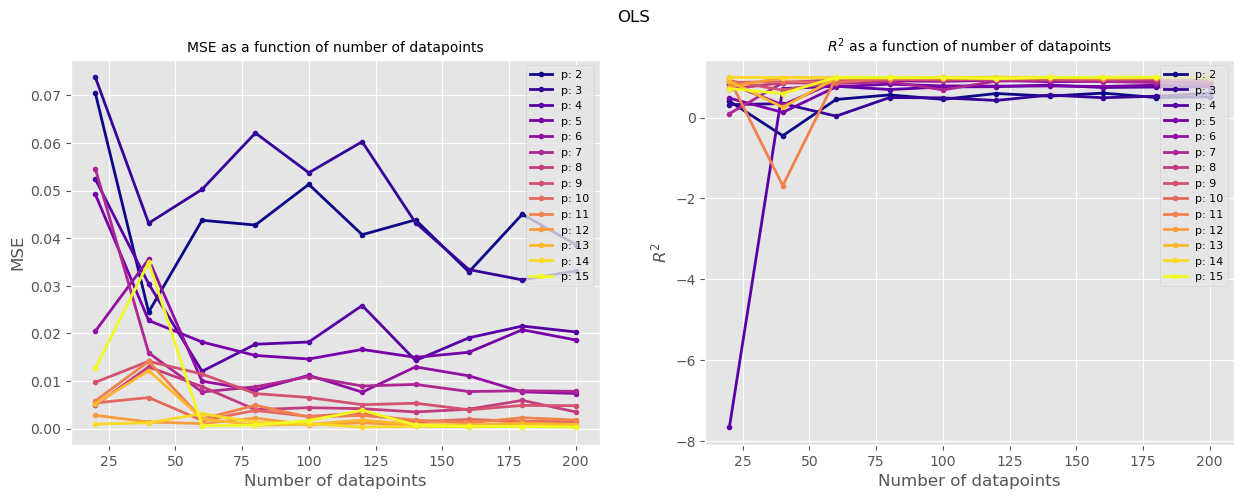

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='plasma'
num_colors = len(p_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, pe in enumerate(p_vals):
    p_df = df_OLS[df_OLS['p'] == pe]
    color = cmap(i) 
    ax[0].plot(p_df['n'], p_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe}')

ax[0].set_title('MSE as a function of number of datapoints', fontsize=10)
ax[0].legend(loc='upper right', fontsize=8)
ax[0].set_xlabel('Number of datapoints')
ax[0].set_ylabel('MSE')

for i, pe in enumerate(p_vals):
    p_df = df_OLS[df_OLS['p'] == pe]
    color = cmap(i) 
    ax[1].plot(p_df['n'], p_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe}')

ax[1].set_title(r'$R^2$ as a function of number of datapoints', fontsize=10)
ax[1].legend(loc='upper right', fontsize=8)
ax[1].set_xlabel('Number of datapoints')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle('OLS')


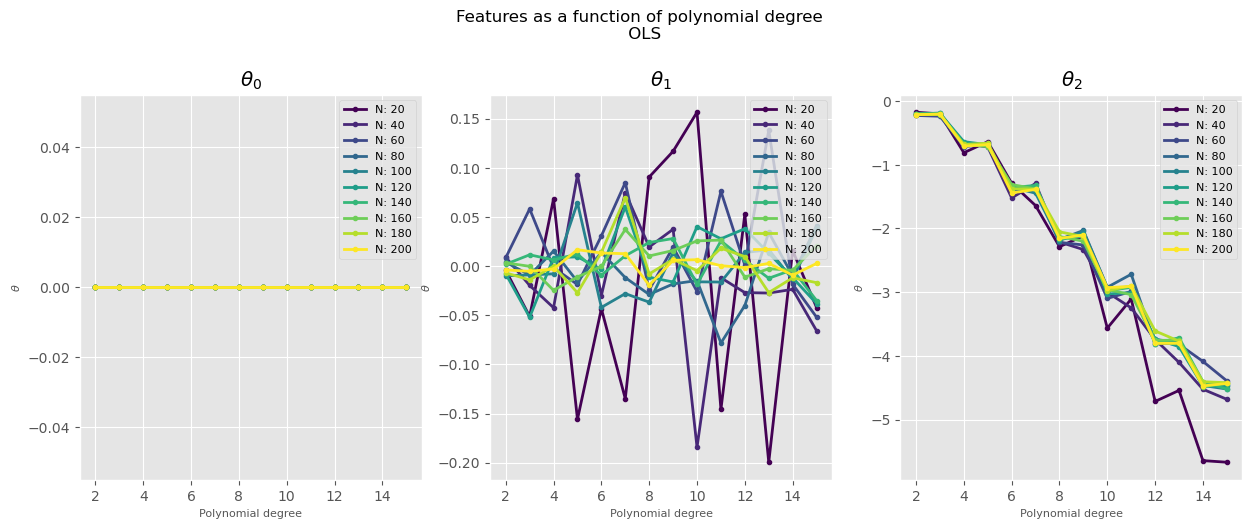

In [6]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

colormap='viridis'
num_colors = len(n_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, en in enumerate(n_vals):
    n_df = df_OLS[df_OLS['n'] == en]
    color = cmap(i) 
    ax[0].plot(n_df['p'], n_df['theta'].apply(lambda x: x[0]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')
    ax[1].plot(n_df['p'], n_df['theta'].apply(lambda x: x[1]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')
    ax[2].plot(n_df['p'], n_df['theta'].apply(lambda x: x[2]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')

ax[0].set_title(r'$\theta_0$')
ax[1].set_title(r'$\theta_1$')
ax[2].set_title(r'$\theta_2$')

fig.suptitle(f'Features as a function of polynomial degree \n OLS', y=1.05)

for axs in ax:
    axs.legend(loc='upper right', fontsize=8)
    axs.set_xlabel('Polynomial degree', fontsize=8)
    axs.set_ylabel(r'$\theta$', fontsize=8)

__Comment parameters__:
...

__Comment scaling method:__
...

#### Part b) Ridge regression analysis for the Runge function

* Write method for Ridge as in a)
* Perform same analysis as above, but now for different values of the hyperparameter.
* Compare it to the results in a)

In [7]:
lambdas = np.logspace(-4, 2, 15)

In [8]:
results = []

for n in n_vals:
    x, y = make_data(n)

    for p in p_vals:
        for l in lambdas:
            X = polynomial_features(x, p, intercept=False)
            X, y = standardize(X, y)
            X_train, X_test, y_train, y_test = split_n_train(X, y, size=0.2)

            theta = Ridge_parameters(X_train, y_train)
            y_pred = X_test @ theta

            results.append({'n': n, 'p': p, 'theta': theta, 'lambda': l, 'MSE': MSE(y_test, y_pred), 'R2': R2(y_test, y_pred)})

df_Ridge = pd.DataFrame(results)

Text(0.5, 0.98, 'Ridge \n Datapoints: 200')

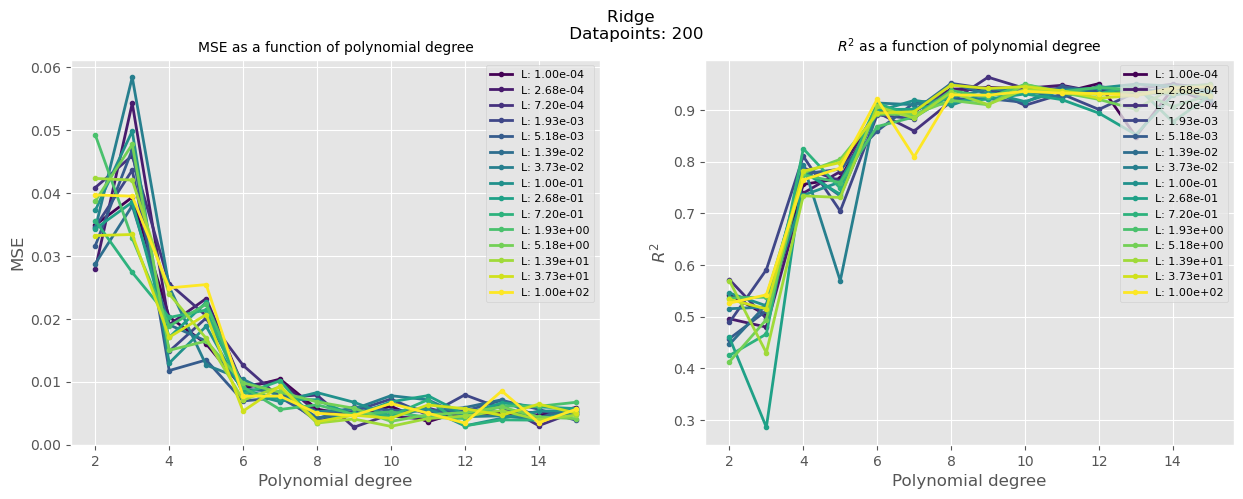

In [9]:
# Choosing a n-value to plot for
n_val = n_vals[-1]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='viridis'
num_colors = len(lambdas)
cmap = plt.get_cmap(colormap, num_colors)

for i, l in enumerate(lambdas):
    n_df = n_df = df_Ridge[(df_Ridge['lambda'] == l) & (df_Ridge['n'] == n_val)]
    color = cmap(i) 
    ax[0].plot(n_df['p'], n_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'L: {l:.2e}')
    ax[1].plot(n_df['p'], n_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'L: {l:.2e}')

ax[0].set_title('MSE as a function of polynomial degree', fontsize=10)
ax[0].legend(loc='upper right', fontsize=8)
ax[0].set_xlabel('Polynomial degree')
ax[0].set_ylabel('MSE')

ax[1].set_title(r'$R^2$ as a function of polynomial degree', fontsize=10)
ax[1].legend(loc='upper right', fontsize=8)
ax[1].set_xlabel('Polynomial degree')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(f'Ridge \n Datapoints: {n_val}')

Text(0.5, 0.98, 'Ridge \n Datapoints: 200')

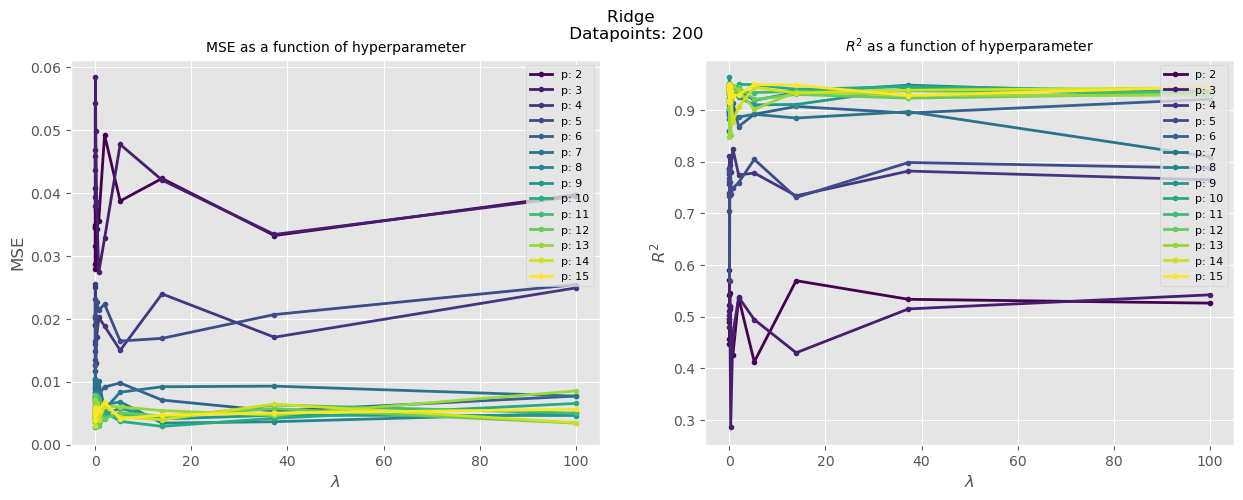

In [10]:
# Choosing a n-value to plot for
n_val = n_vals[-1]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

colormap='viridis'
num_colors = len(p_vals)
cmap = plt.get_cmap(colormap, num_colors)

for i, pe in enumerate(p_vals):
    n_df = n_df = df_Ridge[(df_Ridge['p'] == pe) & (df_Ridge['n'] == n_val)]
    color = cmap(i) 
    ax[0].plot(n_df['lambda'], n_df['MSE'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe:.0f}')
    ax[1].plot(n_df['lambda'], n_df['R2'], marker='o', markersize='3', linewidth='2', color=color, label=f'p: {pe:.0f}')

ax[0].set_title('MSE as a function of hyperparameter', fontsize=10)
ax[0].legend(loc='upper right', fontsize=8)
ax[0].set_xlabel(r'$\lambda$')
ax[0].set_ylabel('MSE')

ax[1].set_title(r'$R^2$ as a function of hyperparameter', fontsize=10)
ax[1].legend(loc='upper right', fontsize=8)
ax[1].set_xlabel(r'$\lambda$')
ax[1].set_ylabel(r'$R^2$')

fig.suptitle(f'Ridge \n Datapoints: {n_val}')

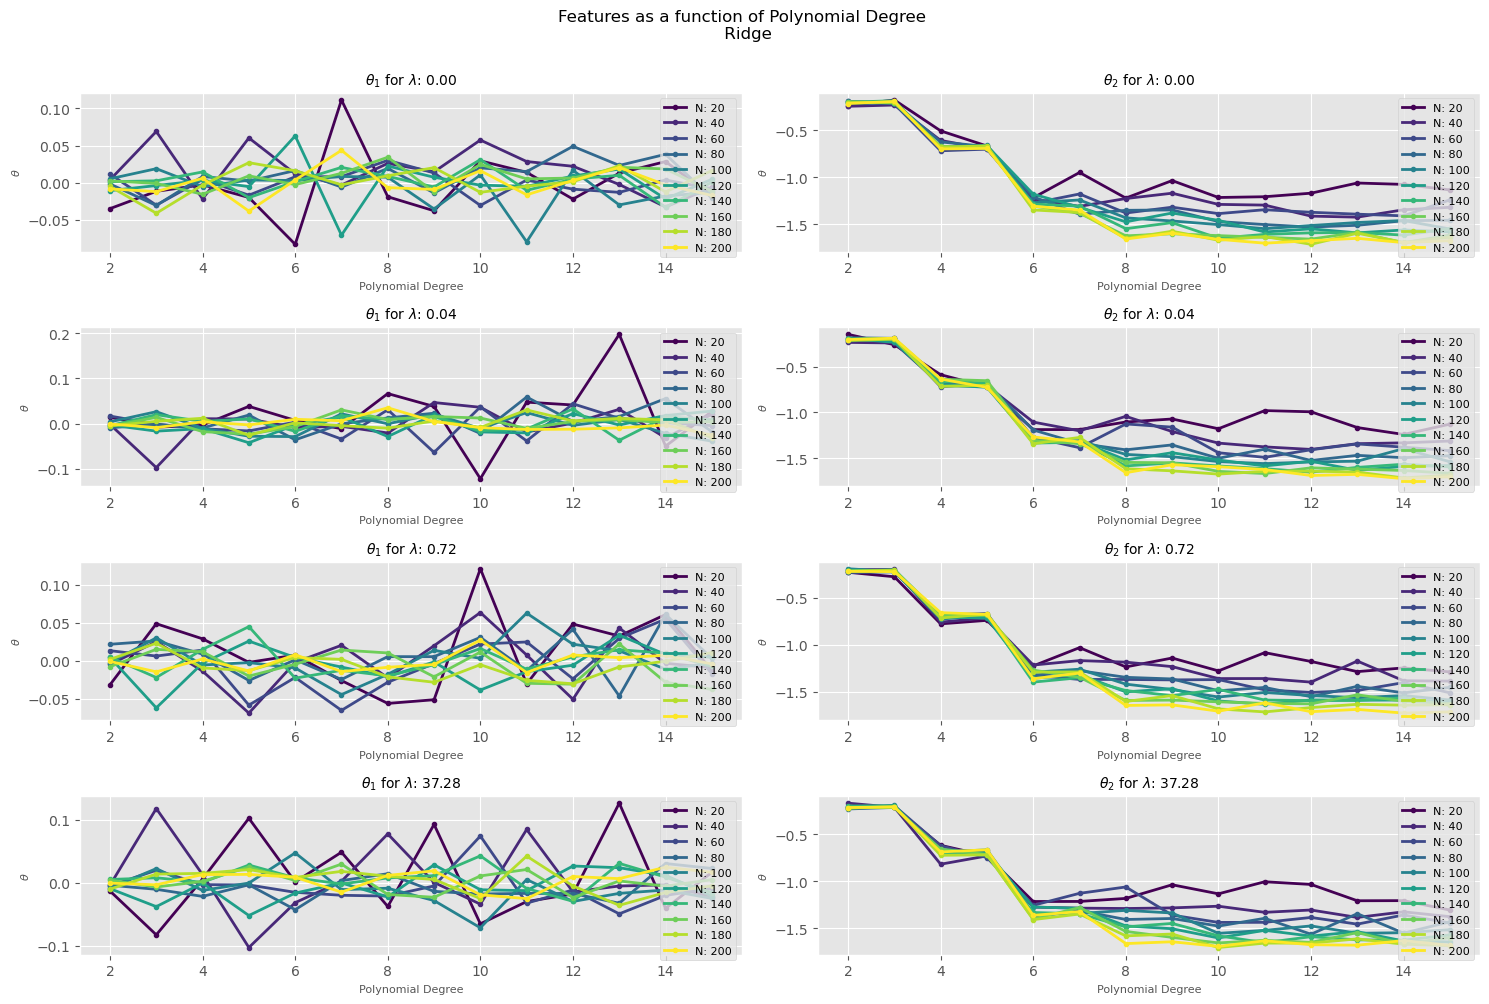

In [11]:
# Selecting specific lambda values to plot
lambda_subset = [lambdas[3], lambdas[6], lambdas[9], lambdas[13]]

fig, ax = plt.subplots(4, 2, figsize=(15, 10))
colormap = 'viridis'
num_colors = len(n_vals)
cmap = plt.get_cmap(colormap, num_colors)

for j, l_val in enumerate(lambda_subset):
    for i, en in enumerate(n_vals):
        n_df = df_Ridge[(df_Ridge['n'] == en) & (df_Ridge['lambda'] == l_val)]
        color = cmap(i)
        ax[j, 0].plot(n_df['p'], n_df['theta'].apply(lambda x: x[0]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')
        ax[j, 1].plot(n_df['p'], n_df['theta'].apply(lambda x: x[1]), marker='o', markersize='3', linewidth='2', color=color, label=f'N: {en}')

    ax[j, 0].set_title(r'$\theta_1$ for $\lambda$: ' + f'{l_val:.2f}', fontsize=10)
    ax[j, 1].set_title(r'$\theta_2$ for $\lambda$: ' + f'{l_val:.2f}', fontsize=10)

fig.suptitle('Features as a function of Polynomial Degree \n Ridge', y=1.0)

for axs in ax.flatten():
    axs.set_xlabel('Polynomial Degree', fontsize=8)
    axs.set_ylabel(r'$\theta$', fontsize=8)
    axs.legend(loc='upper right', fontsize=8)

fig.tight_layout()


__Compare and analyze results in a) and b)__

__Discuss the dependence on hyperparameter__

#### Part c) Writing your own gradient descent code

* Replace analytical expressions for the optimal parameters with gradient descent
* Fixed learning rate
* Study and compare results to a) and b).
* Discuss the role of the learning rate

In [19]:
def gradient_descent(X, y, eta=0.1, n_iters=1000, lamb=0):
    ''' 
    Lambda = 0 -> OLS
    '''

    tol = 1e-8

    n_samples, n_features = X.shape
    theta = np.random.randn(n_features, 1)  # First guess

    mse_history = np.zeros(n_iters)  # For storing MSE

    for i in range(n_iters):
        grad = (2/n_samples) * X.T @ (X @ theta - y) + 2 * lamb * theta
        new_theta = theta - eta*grad
        if np.linalg.norm(new_theta - theta) < tol:
            print(f'Breaking loop at iteration number: {i}')
        theta = new_theta

        mse = MSE(y_data=y, y_pred=X @ theta)
        mse_history[i] = mse
    
    return theta, mse_history

In [24]:
# Chosen parameters for GD analysis
p_vals = 5  # polynomial degree
lamb = [0.01, 1, 10]

In [25]:
# Gradient descent for OLS
# 10 data points
x, y = make_data(n=10)
X = polynomial_features(x, p_vals, intercept=True)
X, y = standardize(X, y)
X_train, X_test, y_train, y_test = split_n_train(X, y, size=0.2)
gd_OLS_theta_n10, gd_OLS_mse_n10 = gradient_descent(X_train, y_train)

# 100 data points
x, y = make_data(n=100)
X = polynomial_features(x, p_vals, intercept=True)
X, y = standardize(X, y)
X_train, X_test, y_train, y_test = split_n_train(X, y, size=0.2)
gd_OLS_theta_n100, gd_OLS_mse_n100 = gradient_descent(X_train, y_train)

In [32]:
# Gradient descent for Ridge


In [33]:
np.shape(gd_OLS_theta_n10)

(6, 8)

#### Part d): Including momentum and more advanced ways to update the learning the rate
Update the code for gradient descent by including:
* momentum
* ADAgrad
* RMSprop
* ADAM

- Discuss and compare the different methods applied to the one-dimensional Runge function.

In [34]:
def gd_momentum():
    ...

In [35]:
def gd_adagrad():
    ...

In [36]:
def gd_rmsprop():
    ...

In [38]:
def gd_adam():
    ...

#### Part e): Writing our own code for LASSO regression

* Use the gradient descent methods you developed in parts c) and d) to solve the LASSO optimization problem.
* You can compare your results with the functionalities of Scikit-Learn.
* Discuss (critically) your results for the Runge function from OLS, Ridge and LASSO regression using the various gradient descent approaches.



In [39]:
...

Ellipsis

#### Part f): Stochastic gradient descent
* Our last gradient step is to include stochastic gradient descent using the same methods to update the learning rates as in parts c-e). 
* Compare and discuss your results with and without stochastic gradient and give a critical assessment of the various methods.

#### Part g): Bias-variance trade-off and resampling techniques

#### Part h): Cross-validation as resampling techniques, adding more complexity